## 데이터 시각화

### 실습 데이터셋 안내

- 2022년 1~12월 간 lg.com의 마케팅 실적 데이터(df_raw)와 <br>
  국가의 제품별 평균 가격을 계산한 피벗 테이블(merged)을 읽습니다.<br><br>

- 위 데이터프레임으로 다양한 그래프를 시각화합니다.

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
# 시각화 관련 모듈을 호출합니다.
from GraphicSetting import *

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# runtime configuration
plt.rc(group = 'font', family = 'Gowun Dodum', size = 10)
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

In [3]:
import sys
sys.path

['C:\\Users\\hdsce\\Documents\\PythonDataAnalysis1\\project',
 'C:\\Users\\hdsce\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\hdsce\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\hdsce\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\hdsce\\AppData\\Local\\Programs\\Python\\Python310',
 'C:\\Users\\hdsce\\ve310',
 '',
 'C:\\Users\\hdsce\\ve310\\lib\\site-packages',
 'C:\\Users\\hdsce\\ve310\\lib\\site-packages\\win32',
 'C:\\Users\\hdsce\\ve310\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\hdsce\\ve310\\lib\\site-packages\\Pythonwin']

### 작업 경로 확인 및 변경

In [4]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonDataAnalysis1\\project'

In [5]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir('../data')

In [6]:
# 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.txt',
 'APT_Merged_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.z',
 'APT_Price_Seoul_2020_2022.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_2020_2022.z',
 'Frequency.xlsx',
 'Naver_Shopping_29938164618.xlsx',
 'NA_Sample.xlsx',
 'online_mall.csv',
 'Online_Mall.z',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Raw.xlsx']

In [7]:
os.mkdir('imsi')

In [8]:
os.listdir()

['APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.txt',
 'APT_Merged_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.z',
 'APT_Price_Seoul_2020_2022.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_2020_2022.z',
 'Frequency.xlsx',
 'imsi',
 'Naver_Shopping_29938164618.xlsx',
 'NA_Sample.xlsx',
 'online_mall.csv',
 'Online_Mall.z',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Raw.xlsx']

In [9]:
os.rmdir('imsi')

In [10]:
os.listdir()

['APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.txt',
 'APT_Merged_Seoul_2022.xlsx',
 'APT_Merged_Seoul_2022.z',
 'APT_Price_Seoul_2020_2022.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_2020_2022.z',
 'Frequency.xlsx',
 'Naver_Shopping_29938164618.xlsx',
 'NA_Sample.xlsx',
 'online_mall.csv',
 'Online_Mall.z',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Raw.xlsx']

### 실습 데이터셋 준비

In [11]:
# 'Online_Mall.z' 파일을 호출합니다.
# [힌트] joblib.load() 함수를 사용하세요.
# [참고] 두 데이터프레임을 원소로 갖는 리스트를 반환합니다.
joblib.load('Online_Mall.z')

[      country       date category        subcategory  detail_page  \
 0          au 2022-01-01       HE                 TV         4485   
 1          au 2022-01-02       HA       Refrigerator         3419   
 2          au 2022-01-02       HE                 TV         4676   
 3          au 2022-01-03       HA  Cooking_Appliance          546   
 4          au 2022-01-03       HA       Refrigerator         3691   
 ...       ...        ...      ...                ...          ...   
 13903      uk 2022-12-31       HA       Refrigerator          756   
 13904      uk 2022-12-31       HA             Washer          579   
 13905      uk 2022-12-31       HA       Washer_Dryer          278   
 13906      uk 2022-12-31       HE          Audio_CAV         1939   
 13907      uk 2022-12-31       HE                 TV         8393   
 
        add_to_cart  sales_amt  sales_usd  month  
 0               17         10     398.96      1  
 1               20          2    1212.33      1  
 2   

In [12]:
# 압축 파일을 호출하고 rawdat, merged에 할당합니다.
rawdat, merged = joblib.load('Online_Mall.z')

In [13]:
# rawdat의 정보를 확인합니다.
rawdat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13901 entries, 0 to 13907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country      13901 non-null  object        
 1   date         13901 non-null  datetime64[ns]
 2   category     13901 non-null  object        
 3   subcategory  13901 non-null  object        
 4   detail_page  13901 non-null  int64         
 5   add_to_cart  13901 non-null  int64         
 6   sales_amt    13901 non-null  int64         
 7   sales_usd    13901 non-null  float64       
 8   month        13901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.1+ MB


In [14]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,date,category,subcategory,detail_page,add_to_cart,sales_amt,sales_usd,month
0,au,2022-01-01,HE,TV,4485,17,10,398.96,1
1,au,2022-01-02,HA,Refrigerator,3419,20,2,1212.33,1
2,au,2022-01-02,HE,TV,4676,14,3,113.99,1
3,au,2022-01-03,HA,Cooking_Appliance,546,3,2,279.17,1
4,au,2022-01-03,HA,Refrigerator,3691,7,5,106.26,1


In [15]:
# merged의 정보를 확인합니다.
merged.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('BS', 'IT_Laptop') to ('HE', 'TV')
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amt_au  12 non-null     float64
 1   amt_br  10 non-null     float64
 2   amt_de  13 non-null     float64
 3   amt_fr  13 non-null     float64
 4   amt_it  14 non-null     int64  
 5   amt_uk  11 non-null     float64
 6   usd_au  12 non-null     float64
 7   usd_br  10 non-null     float64
 8   usd_de  13 non-null     float64
 9   usd_fr  13 non-null     float64
 10  usd_it  14 non-null     float64
 11  usd_uk  11 non-null     float64
 12  avg_au  12 non-null     float64
 13  avg_br  10 non-null     float64
 14  avg_de  13 non-null     float64
 15  avg_fr  13 non-null     float64
 16  avg_it  14 non-null     float64
 17  avg_uk  11 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 2.2+ KB


In [16]:
# merged를 출력합니다.
merged

amt_au   amt_br  amt_de  amt_fr  amt_it  amt_uk  \
category subcategory                                                          
BS       IT_Laptop           107.0    631.0   961.0   785.0     181   907.0   
         IT_Monitor          707.0   1774.0  6430.0  2339.0    1670  3569.0   
         IT_Projector          NaN    333.0    99.0    64.0       8    48.0   
         Monitor             262.0      NaN  1212.0    38.0     204    46.0   
HA       Air_Conditioner       NaN   1575.0    44.0     NaN      91     NaN   
         Cooking_Appliance   717.0   1501.0   362.0   196.0     543     NaN   
         Dishwasher          386.0      NaN     NaN   141.0     269    40.0   
         Dryer               567.0      NaN   206.0   100.0    1433   508.0   
         Refrigerator       2320.0    746.0   730.0   541.0    2082  1542.0   
         Vacuum_Cleaner      832.0      NaN    24.0    93.0     290     NaN   
         Washer             1248.0   5506.0   611.0   377.0    1976  1305.0   
         Washer_Dryer        182.0    223.0   234.0   201.0     440   669.0   
HE       Audio_CAV           628.0   2423.0   895.0  1233.0     576  2592.0   
         TV                 6240.0  13974.0  2745.0  2976.0    3167  4480.0   

                                usd_au       usd_br      usd_de      usd_fr  \
category subcategory                                                          
BS       IT_Laptop           120568.37    663428.91  1126577.00   981187.83   
         IT_Monitor          357615.10    588190.34  3933698.88  1201386.73   
         IT_Projector              NaN    197317.69   152640.03   112714.60   
         Monitor              78368.61          NaN   789805.51    16636.96   
HA       Air_Conditioner           NaN    894685.05    24673.91         NaN   
         Cooking_Appliance   130168.31    197218.91    28760.67    41747.69   
         Dishwasher          237703.44          NaN         NaN   100043.82   
         Dryer               447514.86          NaN   145945.68    82572.87   
         Refrigerator       1705464.25   1760975.49   730501.73   693651.44   
         Vacuum_Cleaner      247938.16          NaN    12967.37    39157.52   
         Washer              846950.11   4995831.47   336781.79   305726.66   
         Washer_Dryer        104226.41    497474.30   252817.88   195989.94   
HE       Audio_CAV           207558.48    678336.14   220243.35   377576.81   
         TV                 3071010.74  11627958.45  4562673.27  4017971.88   

                                usd_it      usd_uk       avg_au       avg_br  \
category subcategory                                                           
BS       IT_Laptop           172380.50   963043.24  1126.807196  1051.392884   
         IT_Monitor          530034.86  2042778.59   505.820509   331.561635   
         IT_Projector          6193.16    77131.10          NaN   592.545616   
         Monitor              47689.95    34222.19   299.116832          NaN   
HA       Air_Conditioner      78008.44         NaN          NaN   568.054000   
         Cooking_Appliance    78146.84         NaN   181.545760   131.391679   
         Dishwasher          167639.74    42633.63   615.812021          NaN   
         Dryer               941321.62   617174.48   789.267831          NaN   
         Refrigerator       2531623.45  2851055.29   735.113901  2360.556957   
         Vacuum_Cleaner      136311.52         NaN   298.002596          NaN   
         Washer             1227169.78  1207918.68   678.645921   907.343166   
         Washer_Dryer        340698.05   690194.70   572.672582  2230.826457   
HE       Audio_CAV           171648.63   614750.42   330.507134   279.957136   
         TV                 4563924.62  6078313.74   492.149157   832.113815   

                                 avg_de       avg_fr       avg_it       avg_uk  
category subcategory                                                            
BS       IT_Laptop          1172.296566  1249.920803   

In [17]:
merged.index

MultiIndex([('BS',         'IT_Laptop'),
            ('BS',        'IT_Monitor'),
            ('BS',      'IT_Projector'),
            ('BS',           'Monitor'),
            ('HA',   'Air_Conditioner'),
            ('HA', 'Cooking_Appliance'),
            ('HA',        'Dishwasher'),
            ('HA',             'Dryer'),
            ('HA',      'Refrigerator'),
            ('HA',    'Vacuum_Cleaner'),
            ('HA',            'Washer'),
            ('HA',      'Washer_Dryer'),
            ('HE',         'Audio_CAV'),
            ('HE',                'TV')],
           names=['category', 'subcategory'])

### [참고] rawdat와 merged의 행 개수와 열 개수가 다를 때 실행

In [18]:
# rawdat를 생성합니다.
rawdat = pd.read_excel(io = 'Online_Mall_Rawdat.xlsx')

In [19]:
# rawdat의 정보를 확인합니다.
rawdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13901 entries, 0 to 13900
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country      13901 non-null  object        
 1   date         13901 non-null  datetime64[ns]
 2   category     13901 non-null  object        
 3   subcategory  13901 non-null  object        
 4   detail_page  13901 non-null  int64         
 5   add_to_cart  13901 non-null  int64         
 6   sales_amt    13901 non-null  int64         
 7   sales_usd    13901 non-null  float64       
 8   month        13901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 977.5+ KB


In [20]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,date,category,subcategory,detail_page,add_to_cart,sales_amt,sales_usd,month
0,au,2022-01-01,HE,TV,4485,17,10,398.96,1
1,au,2022-01-02,HA,Refrigerator,3419,20,2,1212.33,1
2,au,2022-01-02,HE,TV,4676,14,3,113.99,1
3,au,2022-01-03,HA,Cooking_Appliance,546,3,2,279.17,1
4,au,2022-01-03,HA,Refrigerator,3691,7,5,106.26,1


In [21]:
# merged를 생성합니다.
merged = pd.read_excel(io = 'Online_Mall_Merged.xlsx')

In [22]:
# merged의 정보를 확인합니다.
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     3 non-null      object 
 1   subcategory  14 non-null     object 
 2   amt_au       12 non-null     float64
 3   amt_br       10 non-null     float64
 4   amt_de       13 non-null     float64
 5   amt_fr       13 non-null     float64
 6   amt_it       14 non-null     int64  
 7   amt_uk       11 non-null     float64
 8   usd_au       12 non-null     float64
 9   usd_br       10 non-null     float64
 10  usd_de       13 non-null     float64
 11  usd_fr       13 non-null     float64
 12  usd_it       14 non-null     float64
 13  usd_uk       11 non-null     float64
 14  avg_au       12 non-null     float64
 15  avg_br       10 non-null     float64
 16  avg_de       13 non-null     float64
 17  avg_fr       13 non-null     float64
 18  avg_it       14 non-null     float64
 19  avg_uk    

In [23]:
# merged를 출력합니다.
merged

,category,subcategory,amt_au,amt_br,amt_de,amt_fr,amt_it,amt_uk,usd_au,usd_br,usd_de,usd_fr,usd_it,usd_uk,avg_au,avg_br,avg_de,avg_fr,avg_it,avg_uk
0,BS,IT_Laptop,107.0,631.0,961.0,785.0,181,907.0,120568.37,663428.91,1126577.00,981187.83,172380.50,963043.24,1126.807196,1051.392884,1172.296566,1249.920803,952.378453,1061.789680
1,NaN,IT_Monitor,707.0,1774.0,6430.0,2339.0,1670,3569.0,357615.10,588190.34,3933698.88,1201386.73,530034.86,2042778.59,505.820509,331.561635,611.772765,513.632634,317.386144,572.367215
2,NaN,IT_Projector,NaN,333.0,99.0,64.0,8,48.0,NaN,197317.69,152640.03,112714.60,6193.16,77131.10,NaN,592.545616,1541.818485,1761.165625,774.145000,1606.897917
3,NaN,Monitor,262.0,NaN,1212.0,38.0,204,46.0,78368.61,NaN,789805.51,16636.96,47689.95,34222.19,299.116832,NaN,651.654711,437.814737,233.774265,743.960652
4,HA,Air_Conditioner,NaN,1575.0,44.0,NaN,91,NaN,NaN,894685.05,24673.91,NaN,78008.44,NaN,NaN,568.054000,560.770682,NaN,857.235604,NaN
5,NaN,Cooking_Appliance,717.0,1501.0,362.0,196.0,543,NaN,130168.31,197218.91,28760.67,41747.69,78146.84,NaN,181.545760,131.391679,79.449365,212.998418,143.916832,NaN
6,NaN,Dishwasher,386.0,NaN,NaN,141.0,269,40.0,237703.44,NaN,NaN,100043.82,167639.74,42633.63,615.812021,NaN,NaN,709.530638,623.196059,1065.840750
7,NaN,Dryer,567.0,NaN,206.0,100.0,1433,508.0,447514.86,NaN,145945.68,82572.87,941321.62,617174.48,789.267831,NaN,708.474175,825.728700,656.888779,1214.910394
8,NaN,Refrigerator,2320.0,746.0,730.0,541.0,2082,1542.0,1705464.25,1760975.49,730501.73,693651.44,2531623.45,2851055.29,735.113901,2360.556957,1000.687301,1282.165323,1215.957469,1848.933392
9,NaN,Vacuum_Cleaner,832.0,NaN,24.0,93.0,290,NaN,247938.16,NaN,12967.37,39157.52,136311.52,NaN,298.002596,NaN,540.307083,421.048602,470.039724,NaN


In [24]:
# merged의 category에 있는 결측값을 이전 값으로 채워넣습니다.
merged['category'] = merged['category'].fillna(method = 'ffill')

In [25]:
# merged의 category와 subcategory를 인덱스로 설정합니다.
merged = merged.set_index(keys = ['category', 'subcategory'])

In [26]:
# merged를 출력합니다.
merged

amt_au   amt_br  amt_de  amt_fr  amt_it  amt_uk  \
category subcategory                                                          
BS       IT_Laptop           107.0    631.0   961.0   785.0     181   907.0   
         IT_Monitor          707.0   1774.0  6430.0  2339.0    1670  3569.0   
         IT_Projector          NaN    333.0    99.0    64.0       8    48.0   
         Monitor             262.0      NaN  1212.0    38.0     204    46.0   
HA       Air_Conditioner       NaN   1575.0    44.0     NaN      91     NaN   
         Cooking_Appliance   717.0   1501.0   362.0   196.0     543     NaN   
         Dishwasher          386.0      NaN     NaN   141.0     269    40.0   
         Dryer               567.0      NaN   206.0   100.0    1433   508.0   
         Refrigerator       2320.0    746.0   730.0   541.0    2082  1542.0   
         Vacuum_Cleaner      832.0      NaN    24.0    93.0     290     NaN   
         Washer             1248.0   5506.0   611.0   377.0    1976  1305.0   
         Washer_Dryer        182.0    223.0   234.0   201.0     440   669.0   
HE       Audio_CAV           628.0   2423.0   895.0  1233.0     576  2592.0   
         TV                 6240.0  13974.0  2745.0  2976.0    3167  4480.0   

                                usd_au       usd_br      usd_de      usd_fr  \
category subcategory                                                          
BS       IT_Laptop           120568.37    663428.91  1126577.00   981187.83   
         IT_Monitor          357615.10    588190.34  3933698.88  1201386.73   
         IT_Projector              NaN    197317.69   152640.03   112714.60   
         Monitor              78368.61          NaN   789805.51    16636.96   
HA       Air_Conditioner           NaN    894685.05    24673.91         NaN   
         Cooking_Appliance   130168.31    197218.91    28760.67    41747.69   
         Dishwasher          237703.44          NaN         NaN   100043.82   
         Dryer               447514.86          NaN   145945.68    82572.87   
         Refrigerator       1705464.25   1760975.49   730501.73   693651.44   
         Vacuum_Cleaner      247938.16          NaN    12967.37    39157.52   
         Washer              846950.11   4995831.47   336781.79   305726.66   
         Washer_Dryer        104226.41    497474.30   252817.88   195989.94   
HE       Audio_CAV           207558.48    678336.14   220243.35   377576.81   
         TV                 3071010.74  11627958.45  4562673.27  4017971.88   

                                usd_it      usd_uk       avg_au       avg_br  \
category subcategory                                                           
BS       IT_Laptop           172380.50   963043.24  1126.807196  1051.392884   
         IT_Monitor          530034.86  2042778.59   505.820509   331.561635   
         IT_Projector          6193.16    77131.10          NaN   592.545616   
         Monitor              47689.95    34222.19   299.116832          NaN   
HA       Air_Conditioner      78008.44         NaN          NaN   568.054000   
         Cooking_Appliance    78146.84         NaN   181.545760   131.391679   
         Dishwasher          167639.74    42633.63   615.812021          NaN   
         Dryer               941321.62   617174.48   789.267831          NaN   
         Refrigerator       2531623.45  2851055.29   735.113901  2360.556957   
         Vacuum_Cleaner      136311.52         NaN   298.002596          NaN   
         Washer             1227169.78  1207918.68   678.645921   907.343166   
         Washer_Dryer        340698.05   690194.70   572.672582  2230.826457   
HE       Audio_CAV           171648.63   614750.42   330.507134   279.957136   
         TV                 4563924.62  6078313.74   492.149157   832.113815   

                                 avg_de       avg_fr       avg_it       avg_uk  
category subcategory                                                            
BS       IT_Laptop          1172.296566  1249.920803   

### 히스토그램 시각화

In [27]:
# rawdat에서 subcategory가 TV인 행을 선택하여 raw_tv에 할당합니다.
raw_tv = rawdat[rawdat['subcategory'].eq('TV')]

In [28]:
# raw_tv의 행 개수를 확인합니다.
raw_tv.shape[0]

2064

In [30]:
# raw_tv의 sales_usd에 대한 기술통계량을 확인합니다.
# [참고] 히스토그램을 그리기 전에 연속형 변수의 최솟값과 최댓값을 확인합니다.
raw_tv['sales_usd'].describe()[['min', 'max']]

min       113.99
max    397796.97
Name: sales_usd, dtype: float64

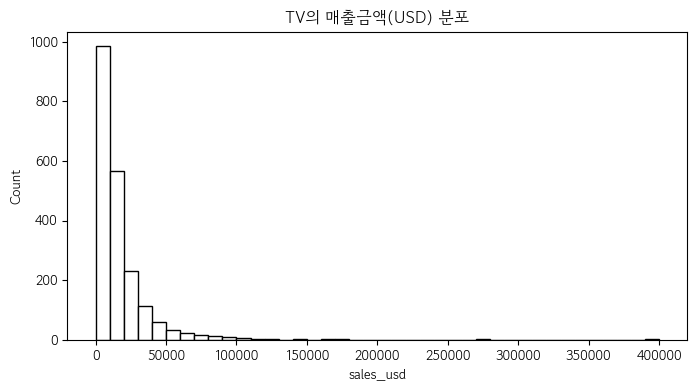

In [32]:
# raw_tv의 sales_usd로 히스토그램을 그립니다.
# [힌트] sns.histplot() 함수를 사용하세요.
# [참고] binrange와 binwidth 매개변수를 추가하면 계급을 지정할 수 있습니다.
# [참고] fc(채우기색) 및 ec(테두리색) 매개변수를 추가하면 색을 지정할 수 있습니다.
sns.histplot(data = raw_tv, x = 'sales_usd', 
             binrange = (0, 400000), binwidth = 10000, 
             fc = '1', ec = '0')

# 그래프 제목을 'TV의 매출금액(USD) 분포'로 지정합니다.
plt.title(label = 'TV의 매출금액(USD) 분포');

In [34]:
# raw_tv에서 sales_usd를 sales_amt로 나눈 avg_price를 생성합니다.
raw_tv['avg_price'] = raw_tv['sales_usd'] / raw_tv['sales_amt']

C:\Users\hdsce\AppData\Local\Temp\ipykernel_13964\464524703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['avg_price'] = raw_tv['sales_usd'] / raw_tv['sales_amt']


In [35]:
# raw_tv의 avg_price에 대한 기술통계량을 확인합니다.
raw_tv['avg_price'].describe()[['min', 'max']]

min       17.25
max    28049.22
Name: avg_price, dtype: float64

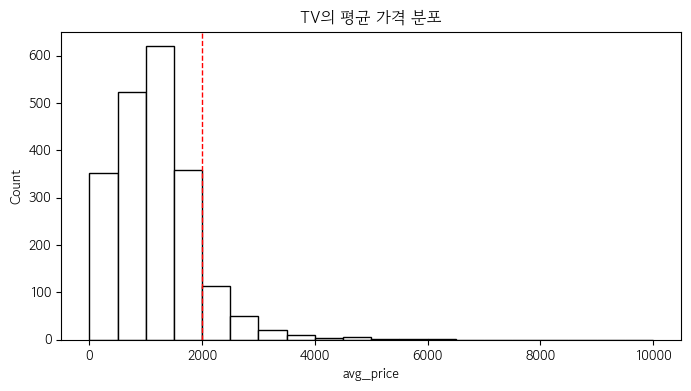

In [43]:
# raw_tv의 avg_price로 히스토그램을 그립니다.
sns.histplot(data = raw_tv, x = 'avg_price', 
             binrange = (0, 10000), binwidth = 500, 
             fc = '1', ec = '0')

# 2000을 기준으로 수직선을 추가합니다.
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포');

In [44]:
# 평균 가격을 2000 기준으로 등급을 추가합니다.
raw_tv['price_grd'] = np.where(raw_tv['avg_price'].ge(2000), 'high', 'low')

C:\Users\hdsce\AppData\Local\Temp\ipykernel_13964\3562020023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['price_grd'] = np.where(raw_tv['avg_price'].ge(2000), 'high', 'low')


In [46]:
# 사용자 팔레트를 설정합니다.
myPal = ['silver', 'gold']

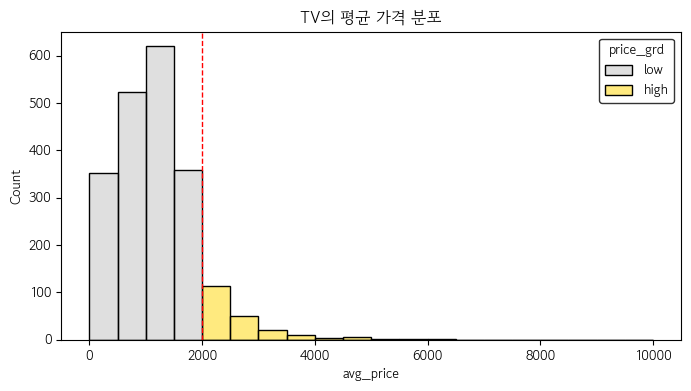

In [47]:
# raw_tv의 avg_price로 히스토그램을 그립니다.
sns.histplot(data = raw_tv, x = 'avg_price', 
             binrange = (0, 10000), binwidth = 500, 
             hue = 'price_grd', ec = '0', palette = myPal)

# 2000을 기준으로 수직선을 추가합니다.
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포');

### 상자 수염 그림 그리기

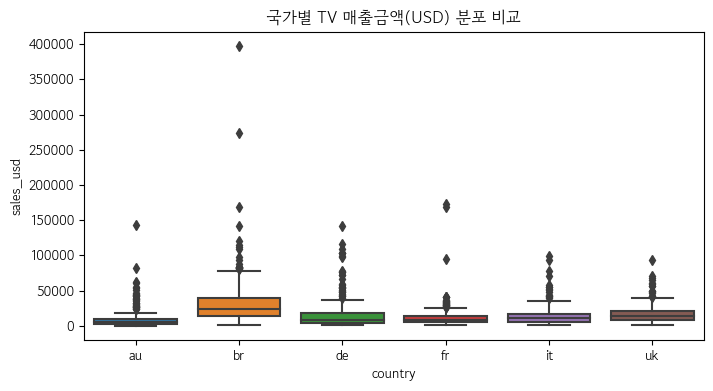

In [39]:
# raw_tv의 국가별 sales_usd로 상자 수염 그림을 그립니다.
# [힌트] sns.boxplot() 함수를 사용하세요.
# [참고] x 매개변수에 범주형, y 매개변수에 연속형 변수를 지정합니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'sales_usd')

# 그래프 제목을 '국가별 TV 매출금액(USD) 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 매출금액(USD) 분포 비교');

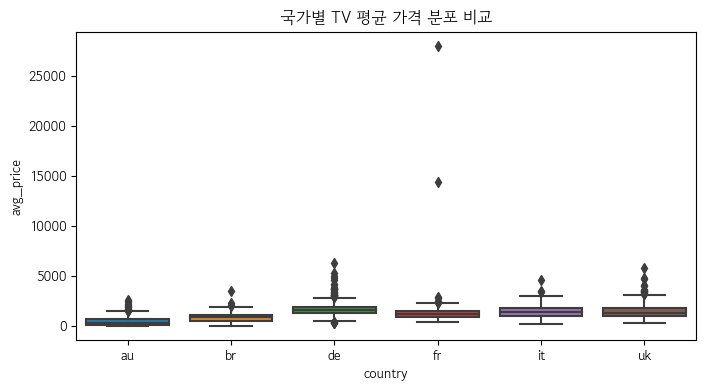

In [40]:
# raw_tv의 국가별 avg_price로 상자 수염 그림을 그립니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'avg_price')

# 그래프 제목을 '국가별 TV 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 분포 비교');

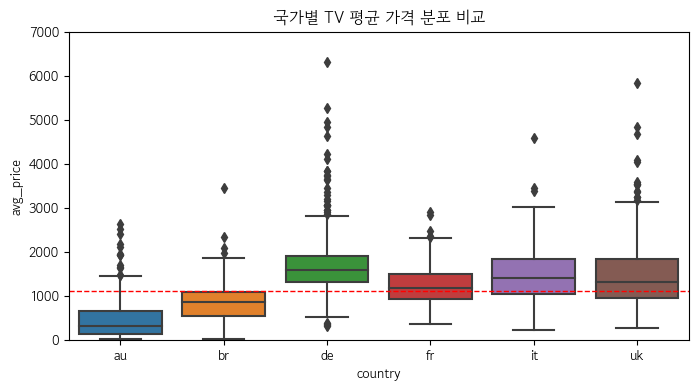

In [42]:
# raw_tv의 국가별 avg_price로 상자 수염 그림을 그립니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'avg_price')

# y축을 0 ~ 7000으로 제한합니다.
plt.ylim(0, 7000)

# 전체 중위수를 가로 직선으로 추가합니다.
plt.axhline(y = raw_tv['avg_price'].median(), color = 'red', lw = 1, ls = '--')

# 그래프 제목을 '국가별 TV 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 분포 비교');

### 막대 그래프 그리기

In [48]:
# merged를 출력합니다.
merged

amt_au   amt_br  amt_de  amt_fr  amt_it  amt_uk  \
category subcategory                                                          
BS       IT_Laptop           107.0    631.0   961.0   785.0     181   907.0   
         IT_Monitor          707.0   1774.0  6430.0  2339.0    1670  3569.0   
         IT_Projector          NaN    333.0    99.0    64.0       8    48.0   
         Monitor             262.0      NaN  1212.0    38.0     204    46.0   
HA       Air_Conditioner       NaN   1575.0    44.0     NaN      91     NaN   
         Cooking_Appliance   717.0   1501.0   362.0   196.0     543     NaN   
         Dishwasher          386.0      NaN     NaN   141.0     269    40.0   
         Dryer               567.0      NaN   206.0   100.0    1433   508.0   
         Refrigerator       2320.0    746.0   730.0   541.0    2082  1542.0   
         Vacuum_Cleaner      832.0      NaN    24.0    93.0     290     NaN   
         Washer             1248.0   5506.0   611.0   377.0    1976  1305.0   
         Washer_Dryer        182.0    223.0   234.0   201.0     440   669.0   
HE       Audio_CAV           628.0   2423.0   895.0  1233.0     576  2592.0   
         TV                 6240.0  13974.0  2745.0  2976.0    3167  4480.0   

                                usd_au       usd_br      usd_de      usd_fr  \
category subcategory                                                          
BS       IT_Laptop           120568.37    663428.91  1126577.00   981187.83   
         IT_Monitor          357615.10    588190.34  3933698.88  1201386.73   
         IT_Projector              NaN    197317.69   152640.03   112714.60   
         Monitor              78368.61          NaN   789805.51    16636.96   
HA       Air_Conditioner           NaN    894685.05    24673.91         NaN   
         Cooking_Appliance   130168.31    197218.91    28760.67    41747.69   
         Dishwasher          237703.44          NaN         NaN   100043.82   
         Dryer               447514.86          NaN   145945.68    82572.87   
         Refrigerator       1705464.25   1760975.49   730501.73   693651.44   
         Vacuum_Cleaner      247938.16          NaN    12967.37    39157.52   
         Washer              846950.11   4995831.47   336781.79   305726.66   
         Washer_Dryer        104226.41    497474.30   252817.88   195989.94   
HE       Audio_CAV           207558.48    678336.14   220243.35   377576.81   
         TV                 3071010.74  11627958.45  4562673.27  4017971.88   

                                usd_it      usd_uk       avg_au       avg_br  \
category subcategory                                                           
BS       IT_Laptop           172380.50   963043.24  1126.807196  1051.392884   
         IT_Monitor          530034.86  2042778.59   505.820509   331.561635   
         IT_Projector          6193.16    77131.10          NaN   592.545616   
         Monitor              47689.95    34222.19   299.116832          NaN   
HA       Air_Conditioner      78008.44         NaN          NaN   568.054000   
         Cooking_Appliance    78146.84         NaN   181.545760   131.391679   
         Dishwasher          167639.74    42633.63   615.812021          NaN   
         Dryer               941321.62   617174.48   789.267831          NaN   
         Refrigerator       2531623.45  2851055.29   735.113901  2360.556957   
         Vacuum_Cleaner      136311.52         NaN   298.002596          NaN   
         Washer             1227169.78  1207918.68   678.645921   907.343166   
         Washer_Dryer        340698.05   690194.70   572.672582  2230.826457   
HE       Audio_CAV           171648.63   614750.42   330.507134   279.957136   
         TV                 4563924.62  6078313.74   492.149157   832.113815   

                                 avg_de       avg_fr       avg_it       avg_uk  
category subcategory                                                            
BS       IT_Laptop          1172.296566  1249.920803   

In [49]:
# merged의 행이름에서 'TV'를 포함하는 행이름을 남겨 lab_tv에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
lab_tv = [index for index in merged.index if 'TV' in index]

In [50]:
# lab_tv를 출력합니다.
lab_tv

[('HE', 'TV')]

In [52]:
# merged에서 행이름이 lab_tv인 행을 선택하여 mgd_tv에 할당합니다.
# [주의] 행이름으로 인덱싱하려면 반드시 loc 인덱서를 사용해야 합니다!
mgd_tv = merged.loc[lab_tv]

In [53]:
# mgd_tv를 출력합니다.
mgd_tv

,,amt_au,amt_br,amt_de,amt_fr,amt_it,amt_uk,usd_au,usd_br,usd_de,usd_fr,usd_it,usd_uk,avg_au,avg_br,avg_de,avg_fr,avg_it,avg_uk
category,subcategory,,,,,,,,,,,,,,,,,,
HE,TV,6240.0,13974.0,2745.0,2976.0,3167,4480.0,3071010.74,11627958.45,4562673.27,4017971.88,4563924.62,6078313.74,492.149157,832.113815,1662.176055,1350.12496,1441.08766,1356.76646


In [54]:
# mgd_tv의 열이름을 출력합니다.
mgd_tv.columns

Index(['amt_au', 'amt_br', 'amt_de', 'amt_fr', 'amt_it', 'amt_uk', 'usd_au',
       'usd_br', 'usd_de', 'usd_fr', 'usd_it', 'usd_uk', 'avg_au', 'avg_br',
       'avg_de', 'avg_fr', 'avg_it', 'avg_uk'],
      dtype='object')

In [55]:
# mgd_tv의 열이름에서 'avg'를 포함하는 열이름을 남겨 lab_avg에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
lab_avg = [col for col in mgd_tv.columns if 'avg' in col]

In [56]:
# lab_avg를 출력합니다.
lab_avg

['avg_au', 'avg_br', 'avg_de', 'avg_fr', 'avg_it', 'avg_uk']

In [58]:
# mgd_tv의 열이름에서 'avg'를 포함하는 열만 선택한 결과를 출력합니다.
mgd_tv.loc[:, lab_avg]

,,avg_au,avg_br,avg_de,avg_fr,avg_it,avg_uk
category,subcategory,,,,,,
HE,TV,492.149157,832.113815,1662.176055,1350.12496,1441.08766,1356.76646


In [59]:
# mgd_tv의 열이름에서 'avg'를 포함하는 열을 Long Type으로 변환합니다.
# [힌트] melt() 함수를 사용하세요.
mgd_tv.loc[:, lab_avg].melt()

,variable,value
0,avg_au,492.149157
1,avg_br,832.113815
2,avg_de,1662.176055
3,avg_fr,1350.124960
4,avg_it,1441.087660
5,avg_uk,1356.766460


In [62]:
mgd_tv.loc[:, lab_avg].melt(var_name = 'country', value_name = 'price')

,country,price
0,avg_au,492.149157
1,avg_br,832.113815
2,avg_de,1662.176055
3,avg_fr,1350.124960
4,avg_it,1441.087660
5,avg_uk,1356.766460


In [60]:
# 위 코드 실행 결과를 mgd_tv_avg에 할당합니다.
mgd_tv_avg = mgd_tv.loc[:, lab_avg].melt()

In [61]:
# mgd_tv_avg의 열이름을 country와 avg_price로 변경합니다.
mgd_tv_avg.columns = ['country', 'avg_price']

In [63]:
mgd_tv_avg

,country,avg_price
0,avg_au,492.149157
1,avg_br,832.113815
2,avg_de,1662.176055
3,avg_fr,1350.124960
4,avg_it,1441.087660
5,avg_uk,1356.766460


In [64]:
# mgd_tv_avg의 country에서 문자열 'avg_'를 삭제합니다.
# [힌트] str.replace() 함수를 사용하세요.
mgd_tv_avg['country'] = mgd_tv_avg['country'].str.replace('avg_', '')

In [67]:
# 국가명을 대문자로 변경합니다.
mgd_tv_avg['country'] = mgd_tv_avg['country'].str.upper()

In [73]:
myPal = np.tile('silver', 6)
myPal[2] = 'red'

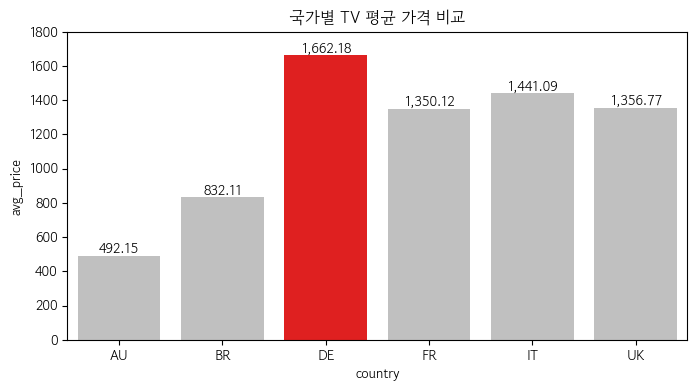

In [74]:
# mgd_tv_avg로 막대 그래프를 그립니다.
# [힌트] sns.barplot() 함수를 사용하세요.
# [참고] x 매개변수에 범주형, y 매개변수에 연속형 변수를 지정합니다.
sns.barplot(data = mgd_tv_avg, x = 'country', y = 'avg_price', palette = myPal)

# 그래프 제목을 '국가별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 비교')

# y축을 0 ~ 1800로 제한합니다.
plt.ylim(0, 1800)

# 막대 위에 평균 가격을 텍스트로 추가합니다.
# [참고] f-문자열로 평균 가격을 소수점 둘째 자리까지 남기면 보기에 좋습니다.
for i, v in enumerate(mgd_tv_avg['avg_price']):
    plt.text(x = i, y = v, s = f'{v:,.2f}', ha = 'center', va = 'bottom')

### 선 그래프 그리기

In [75]:
raw_tv.head()

,country,date,category,subcategory,detail_page,add_to_cart,sales_amt,sales_usd,month,avg_price,price_grd
0,au,2022-01-01,HE,TV,4485,17,10,398.96,1,39.896000,low
2,au,2022-01-02,HE,TV,4676,14,3,113.99,1,37.996667,low
6,au,2022-01-03,HE,TV,4965,27,9,5806.63,1,645.181111,low
12,au,2022-01-04,HE,TV,5035,62,14,3088.30,1,220.592857,low
15,au,2022-01-05,HE,TV,4762,65,13,5387.38,1,414.413846,low


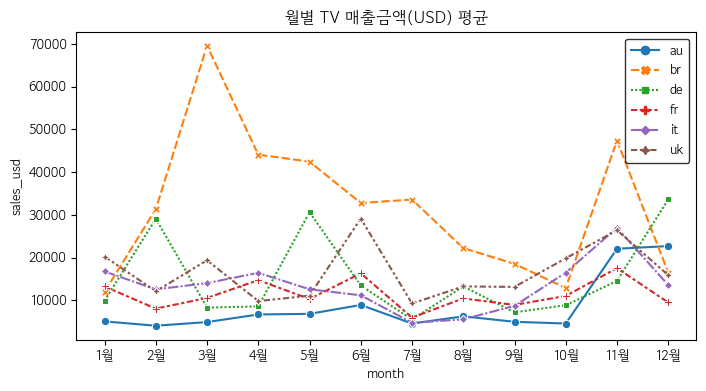

In [85]:
# raw_tv의 month별 국가의 sales_usd 평균을 선 그래프로 그립니다.
# [힌트] sns.lineplot() 함수를 사용하세요.
sns.lineplot(data = raw_tv, x = 'month', y = 'sales_usd', hue = 'country', 
             estimator = np.mean, errorbar = None, 
             markers = True, style = 'country')

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균')

plt.xticks(ticks = range(1, 13), labels = [f'{i}월' for i in range(1, 13)])

# 범례의 위치를 오른쪽 상단으로 지정합니다.
plt.legend(loc = 'upper right');

## End of Document